In [1]:
import pandas as pd
import numpy as np
import vertica_python
import os
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')
conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False}

In [11]:
query = """
SELECT
year_of_enrollment,
time_to_verify,
count(1) as cnt_users
from
(
select 
user_id,
a.course_id,
first_enrollment_time,
YEAR(first_enrollment_time) AS year_of_enrollment,
first_verified_enrollment_time,
TIMESTAMPDIFF('minute', first_enrollment_time, first_verified_enrollment_time) as time_to_verify
from production.d_user_course a
JOIN business_intelligence.course_master b
ON a.course_id = b.course_id
AND a.first_enrollment_time <= b.course_verification_end_date
and first_verified_enrollment_time is not null
) a 
group by 1,2

"""

In [12]:
connection = vertica_python.connect(**conn_info)

cur = connection.cursor('dict')

cur.execute(query)
extract = cur.fetchall()
df = pd.DataFrame(extract)

connection.close()

In [13]:
df

,year_of_enrollment,time_to_verify,cnt_users
0,2016,338383,1
1,2015,407508,1
2,2015,407468,1
3,2015,119844,1
4,2015,119804,1
5,2016,50727,1
6,2016,51119,2
7,2015,407668,1
8,2015,407844,1
9,2017,269754,1


KeyboardInterrupt: 

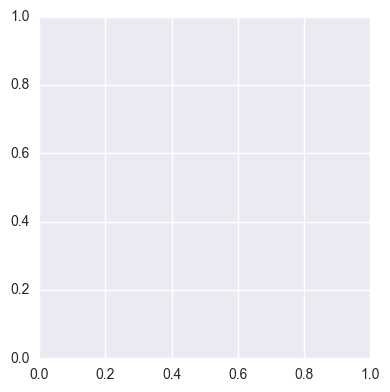

In [14]:
sns.factorplot(

    data = df,
    x = 'time_to_verify',
    y = 'cnt_users',
    kind = 'box'

)